# Trabajo Final Analisis Predictivo_Javier Gilabert Sabater

# Graficar las series, Analizar sus caracteristicas, Trasnformacion

-----

## Analisis Serie Reservas

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd

#obtain hierarchical dataset
from datasetsforecast.hierarchical import HierarchicalData

# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

In [9]:
df_w_r = pd.read_csv('df_reservas.csv', index_col='ArrivalDate')
df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-08-06,703
2017-08-13,717
2017-08-20,797
2017-08-27,678
2017-09-03,349


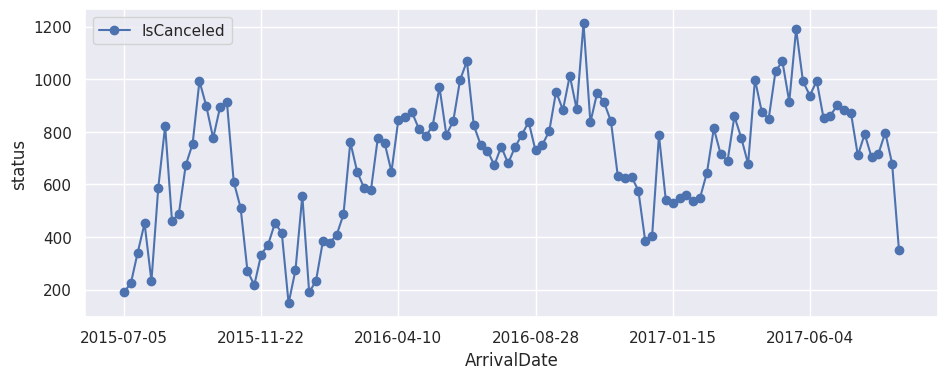

In [14]:
# Graficar las cancelaciones
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
ax = df_w_r.plot(marker='o', linestyle='-')
ax.set_ylabel('status');

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


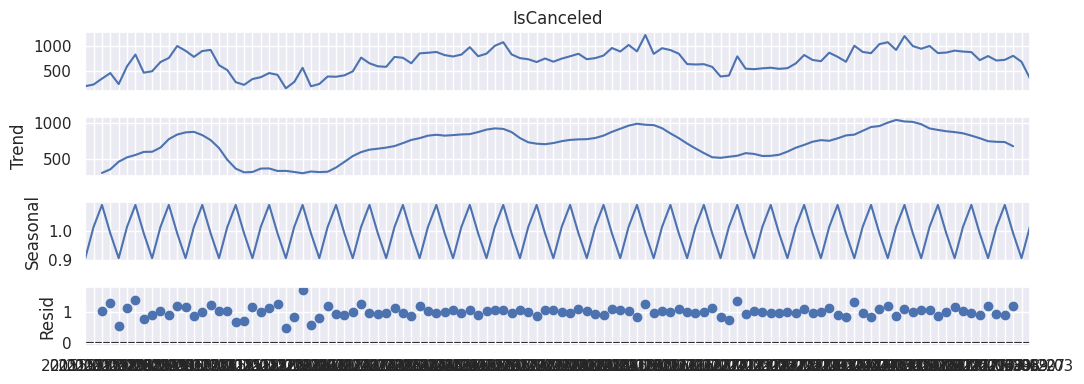

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_w_r['IsCanceled'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

In [ ]:
 ## Calculamos la transformacion logarítmica

Realizar la transformación logarítmica ayuda a estabilizar la varianza y a efatizar los cambios relativos

In [ ]:
# Log Transformer Function
from sktime.transformations.series.boxcox import LogTransformer

In [ ]:
# Apply Log Transformer

transformer = LogTransformer()
log_df_w = transformer.fit_transform(df_w)
log_df_w.tail()

,IsCanceled
ArrivalDate,
2017-08-06,6.555357
2017-08-13,6.575076
2017-08-20,6.680855
2017-08-27,6.519147
2017-09-03,5.855072


Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

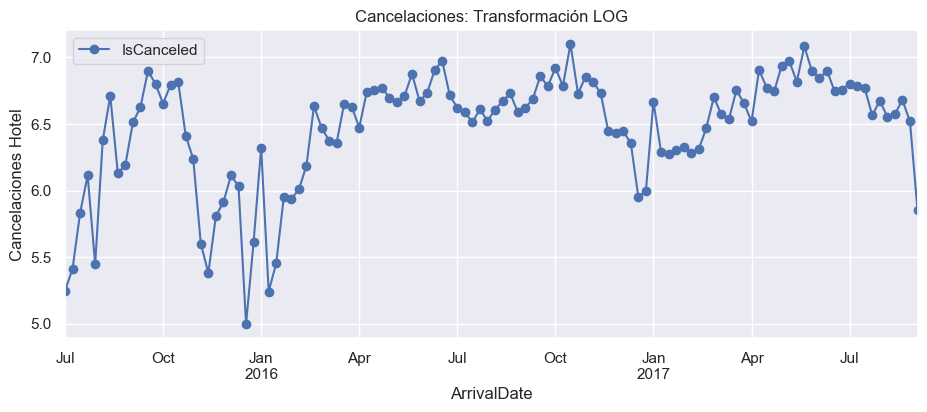

In [ ]:
# Plot Log Data
ax = log_df_w.plot(marker='o', linestyle='-')
ax.set_ylabel('Cancelaciones Hotel')
ax.set_title('Cancelaciones: Transformación LOG')

Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

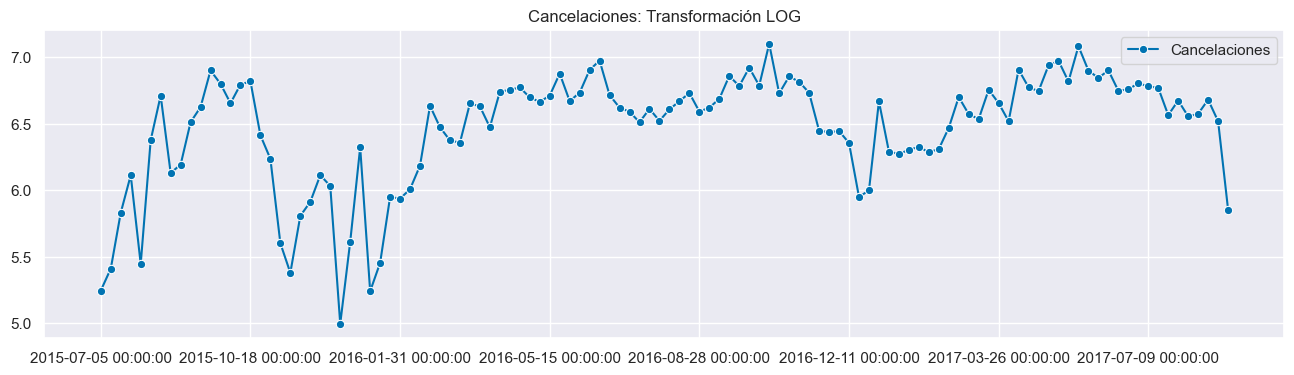

In [ ]:
# Plot Log Data
from sktime.utils.plotting import plot_series
fig, ax =plot_series(log_df_w, labels=["Cancelaciones"])
ax.set_title('Cancelaciones: Transformación LOG')

Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

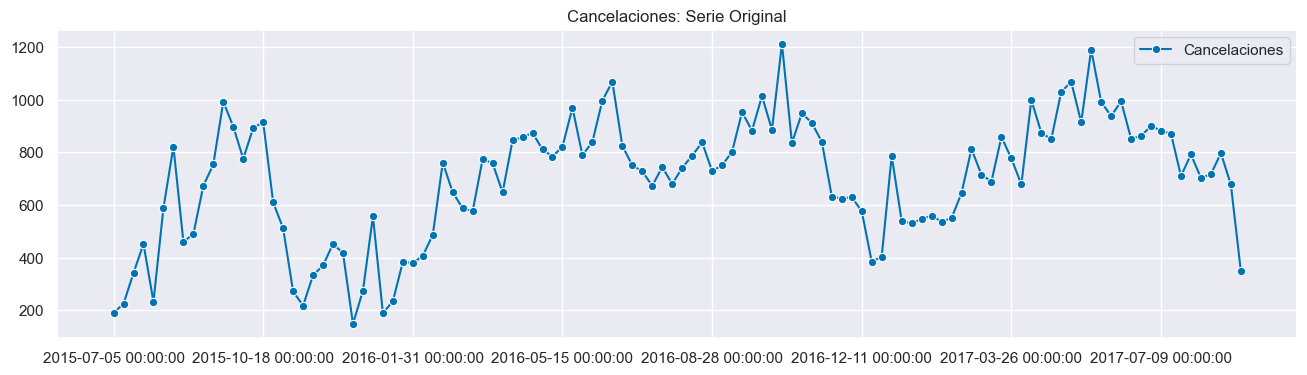

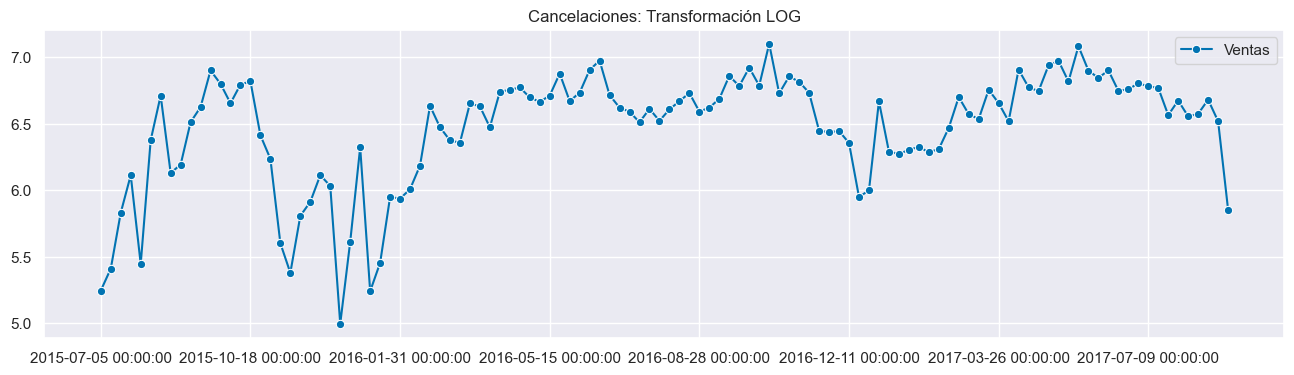

In [ ]:
## Comparamos la transformacion logarítmica de la Serie Original y la Serie en Log
# Plot Log Data & Original Data
fig, ax =plot_series(df_w, labels=["Cancelaciones"])
ax.set_title('Cancelaciones: Serie Original')
fig, ax =plot_series(log_df_w, labels=["Ventas"])
ax.set_title('Cancelaciones: Transformación LOG')

### Vamos a calcular la correlacion de la serie en Log

In [ ]:
# Autocorrelation Fuction Package
from sktime.utils.plotting import plot_correlations

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

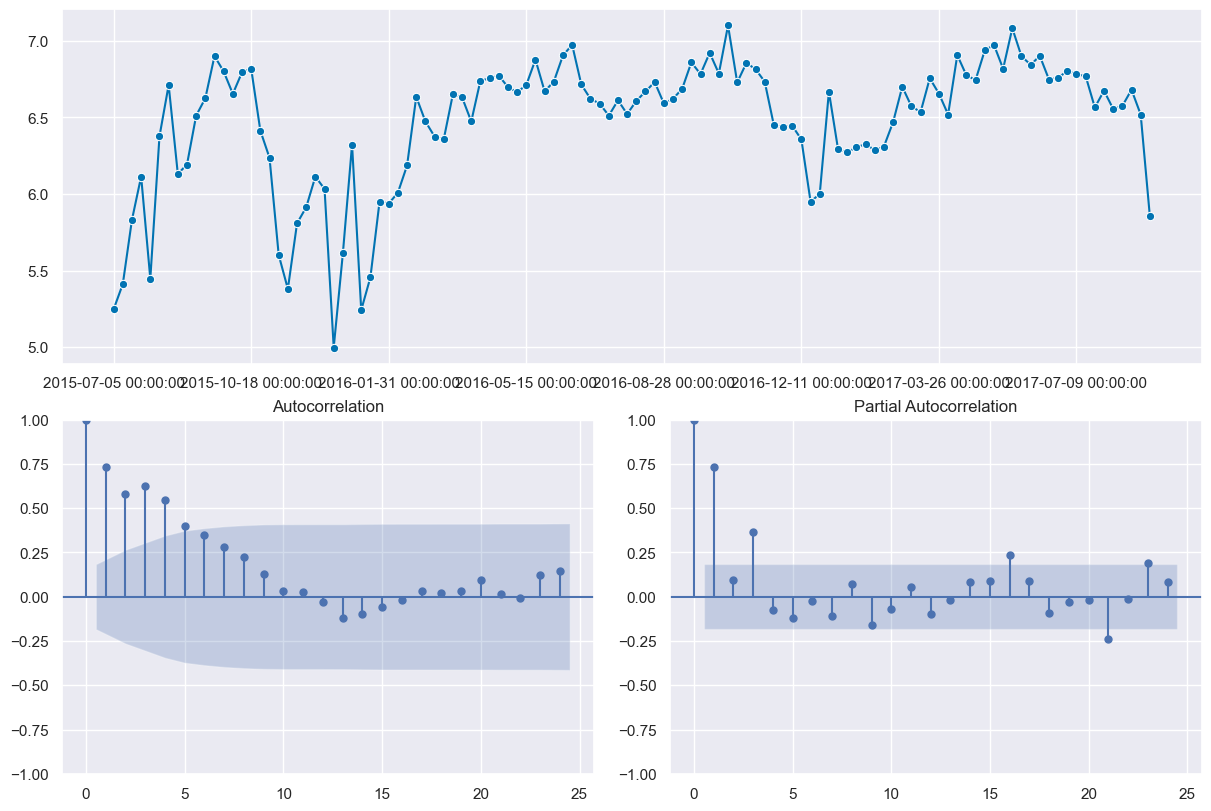

In [ ]:
# Autocorrelation Fuction Original Time Series
plot_correlations(log_df_w)

Ahora, haremos una diferenciacion: La diferenciación es una técnica que se utiliza para hacer que una serie temporal sea estacionaria.

In [ ]:
# Difference Fuction Package
from sktime.transformations.series.difference import Differencer

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

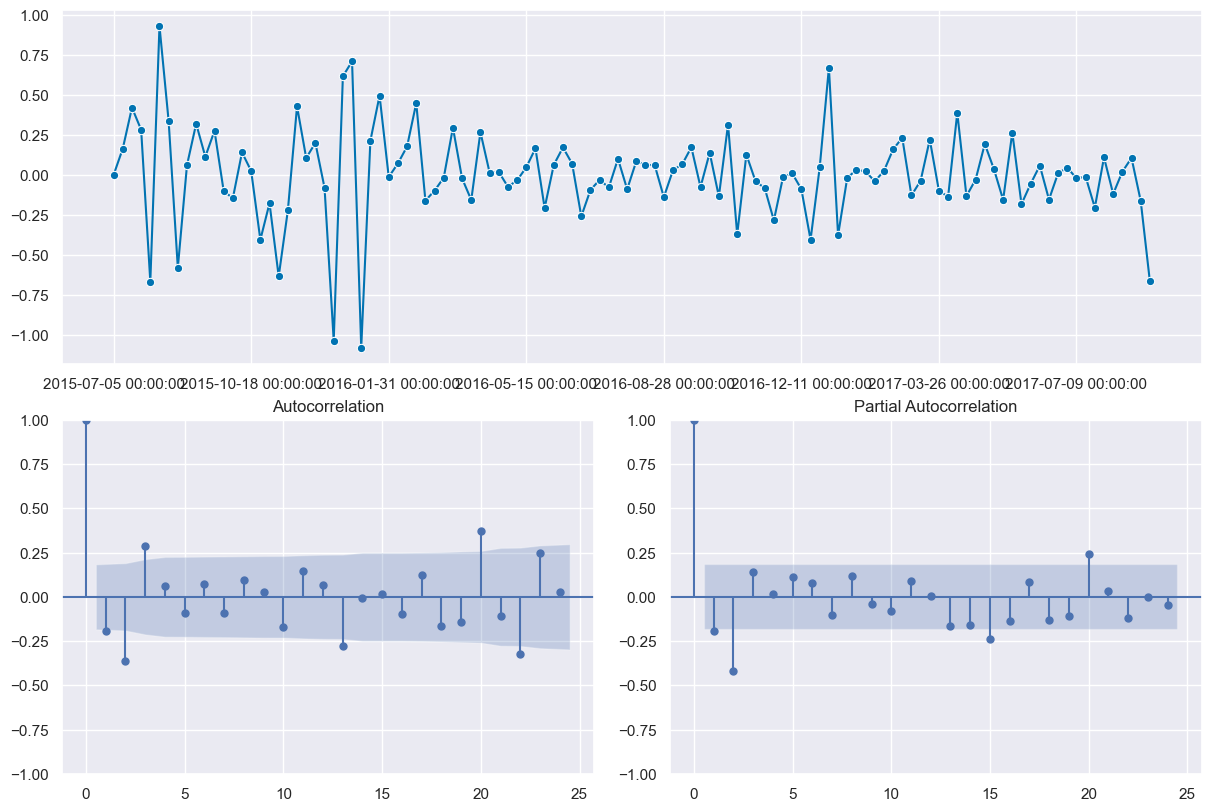

In [ ]:
# Autocorrelation Fuction
# d=1; D=0; S=4
# 
transf_diff=Differencer(lags=[1])
plot_correlations(transf_diff.fit_transform(log_df_w))

Differencer es una clase o función que realiza la diferenciación, y estás especificando que se realice una diferenciación no estacional (d=1) con un lag de 1. De Lag 1, significa que se está diferenciando la serie temporal una vez sin tener en cuenta patrones estacionales

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

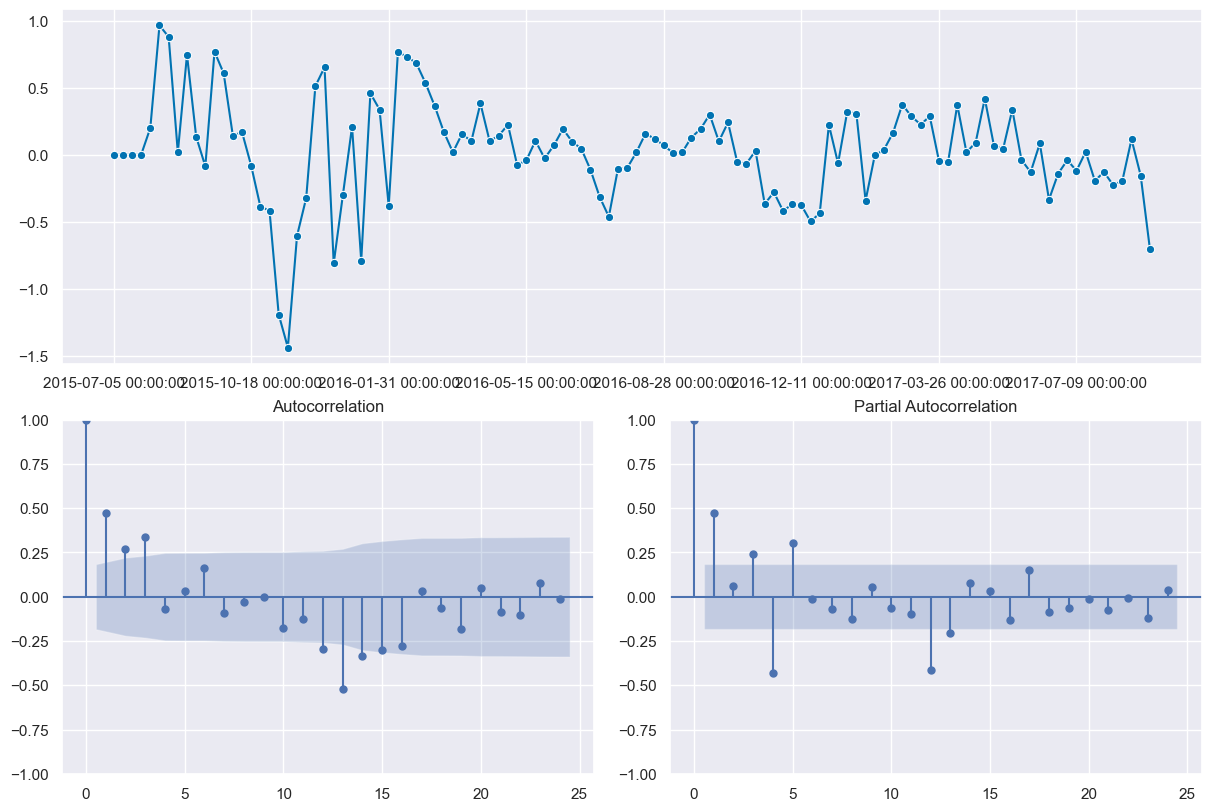

In [ ]:
# Autocorrelation Fuction
# d=0; D=1; S=4
# 
transf_diff=Differencer(lags=[4])
plot_correlations(transf_diff.fit_transform(log_df_w))

La diferenciación estacional implica tomar la diferencia entre los valores de la serie temporal en el mismo punto en diferentes estaciones o períodos, y en este caso, el período es de 4 unidades de tiempo (en este caso, semanas).

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

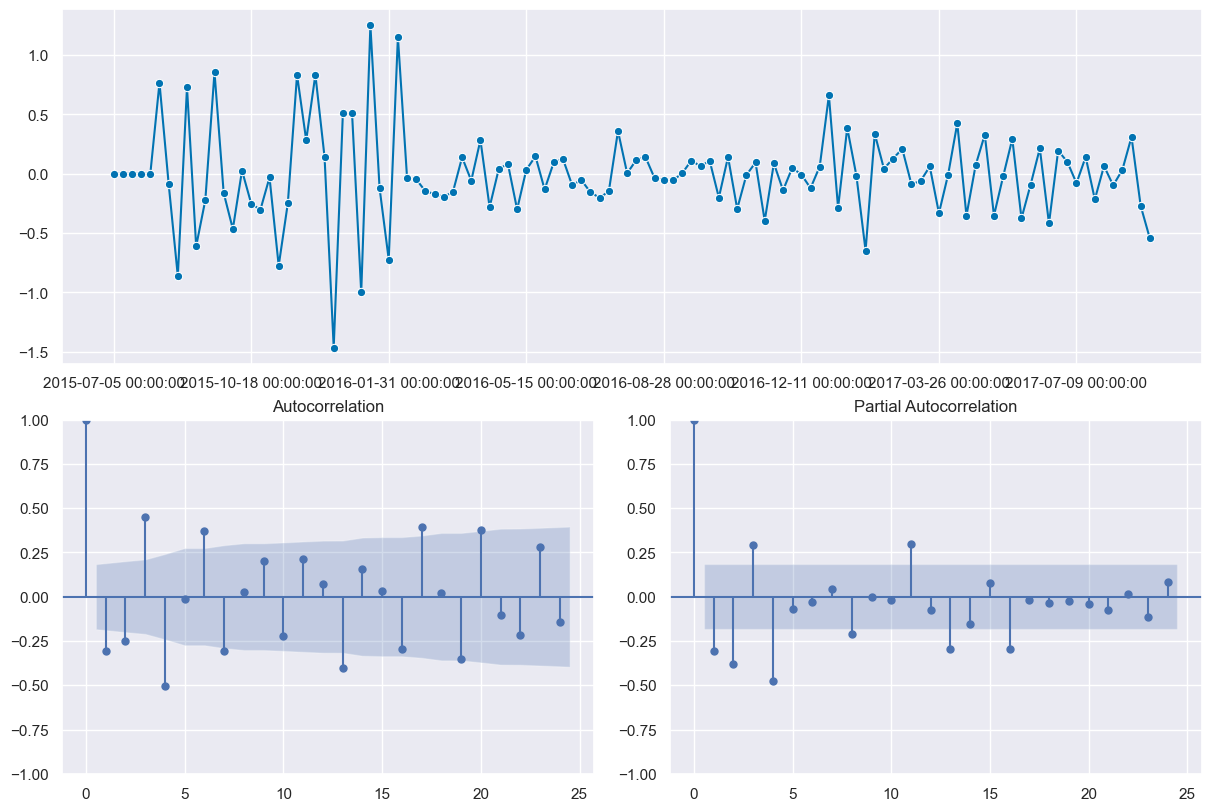

In [ ]:
# Autocorrelation Fuction
# d=1; D=1; S=4
# 
transf_diff=Differencer(lags=[1,4])
plot_correlations(transf_diff.fit_transform(log_df_w))

Dos lags especificados: 1 y 4. Dos tipos de diferenciación:
Diferenciación no estacional (lags=[1]): Se tomará la diferencia entre cada valor y su valor  anterior.
Diferenciación estacional (lags=[4]): Se tomará la diferencia entre cada valor y su valor hace 4 períodos de tiempo (en este caso, semanas).

------

## Analisis Serie Cancelaciones

In [6]:
df_w_c = pd.read_csv('df_cancelaciones.csv', index_col='ArrivalDate')
df_w_c.tail()

,IsCanceled
ArrivalDate,
2017-08-06,251
2017-08-13,275
2017-08-20,332
2017-08-27,206
2017-09-03,101


In [7]:
# Graficar las cancelaciones
sns.set(rc={'figure.figsize':(11, 4)})
ax = df_w.plot(marker='o', linestyle='-')
ax.set_ylabel('status');

NameError: name 'sns' is not defined

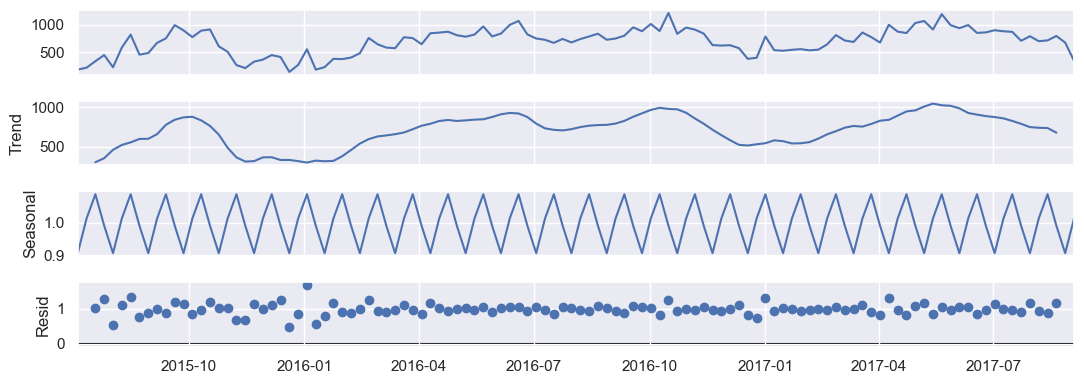

In [ ]:
decomposition = seasonal_decompose(df_w['IsCanceled'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

In [ ]:
 ## Calculamos la transformacion logarítmica

Realizar la transformación logarítmica ayuda a estabilizar la varianza y a efatizar los cambios relativos

In [ ]:
# Apply Log Transformer

transformer = LogTransformer()
log_df_w = transformer.fit_transform(df_w)
log_df_w.tail()

,IsCanceled
ArrivalDate,
2017-08-06,6.555357
2017-08-13,6.575076
2017-08-20,6.680855
2017-08-27,6.519147
2017-09-03,5.855072


Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

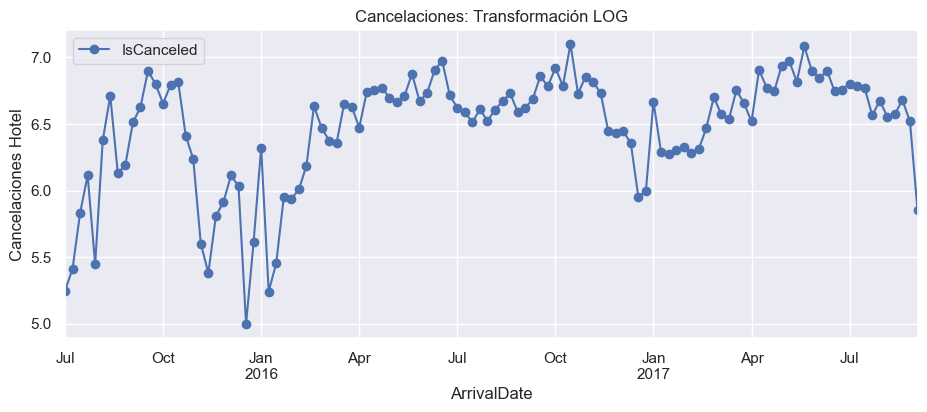

In [ ]:
# Plot Log Data
ax = log_df_w.plot(marker='o', linestyle='-')
ax.set_ylabel('Cancelaciones Hotel')
ax.set_title('Cancelaciones: Transformación LOG')

Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

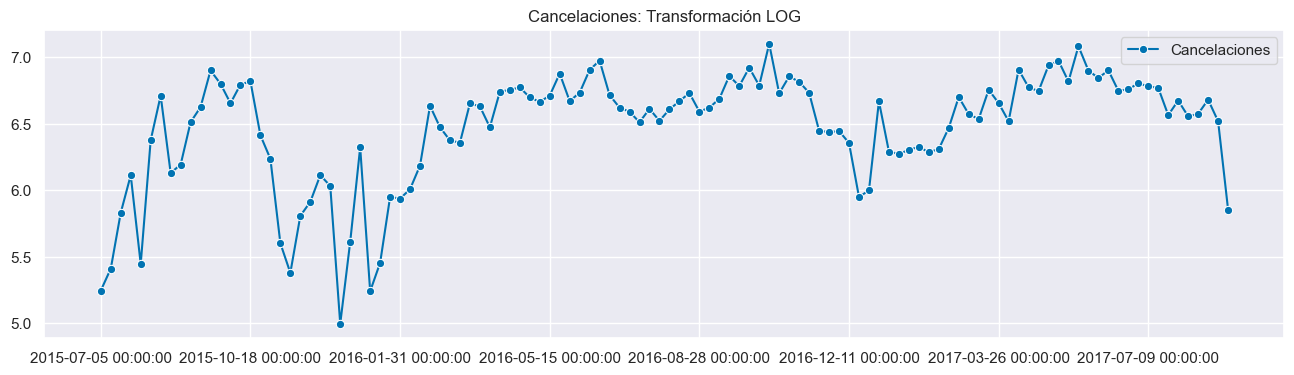

In [ ]:
# Plot Log Data
fig, ax =plot_series(log_df_w, labels=["Cancelaciones"])
ax.set_title('Cancelaciones: Transformación LOG')

Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

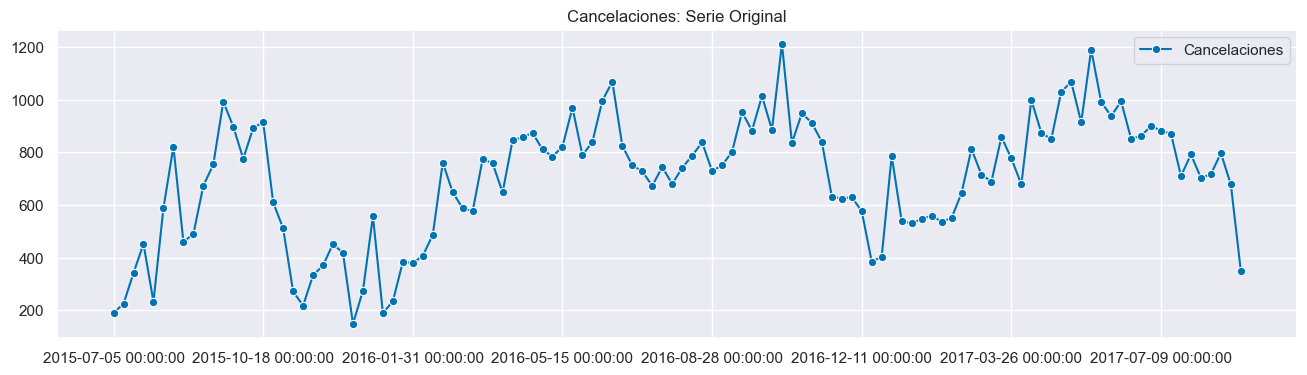

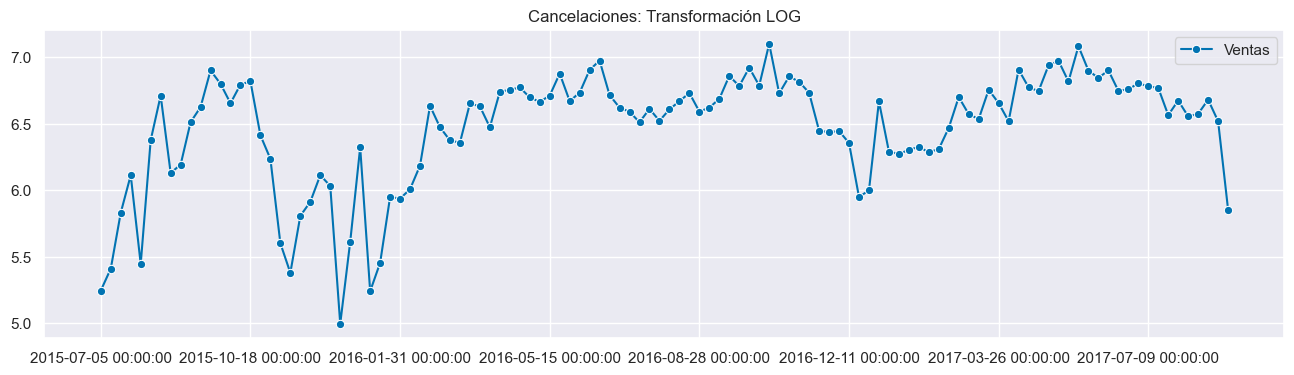

In [ ]:
## Comparamos la transformacion logarítmica de la Serie Original y la Serie en Log
# Plot Log Data & Original Data
fig, ax =plot_series(df_w, labels=["Cancelaciones"])
ax.set_title('Cancelaciones: Serie Original')
fig, ax =plot_series(log_df_w, labels=["Ventas"])
ax.set_title('Cancelaciones: Transformación LOG')

### Vamos a calcular la correlacion de la serie en Log

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

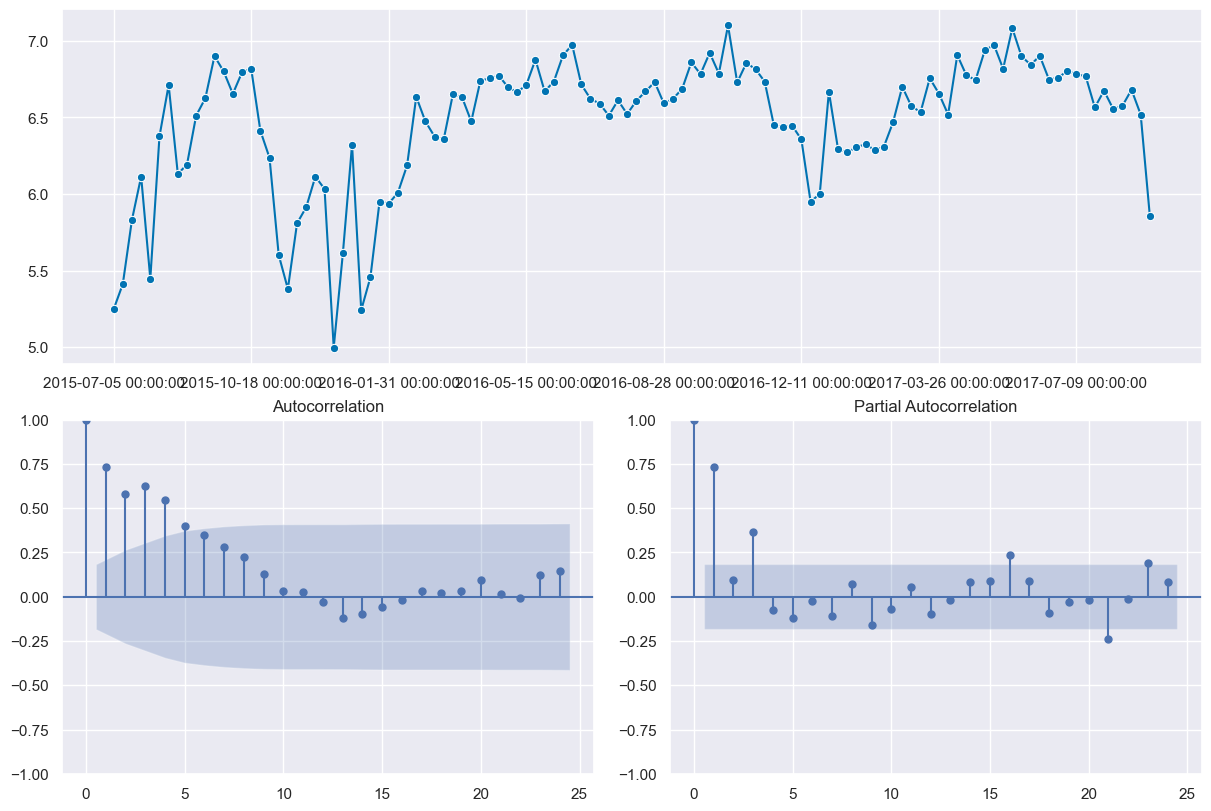

In [ ]:
# Autocorrelation Fuction Original Time Series
plot_correlations(log_df_w)

Ahora, haremos una diferenciacion: La diferenciación es una técnica que se utiliza para hacer que una serie temporal sea estacionaria.

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

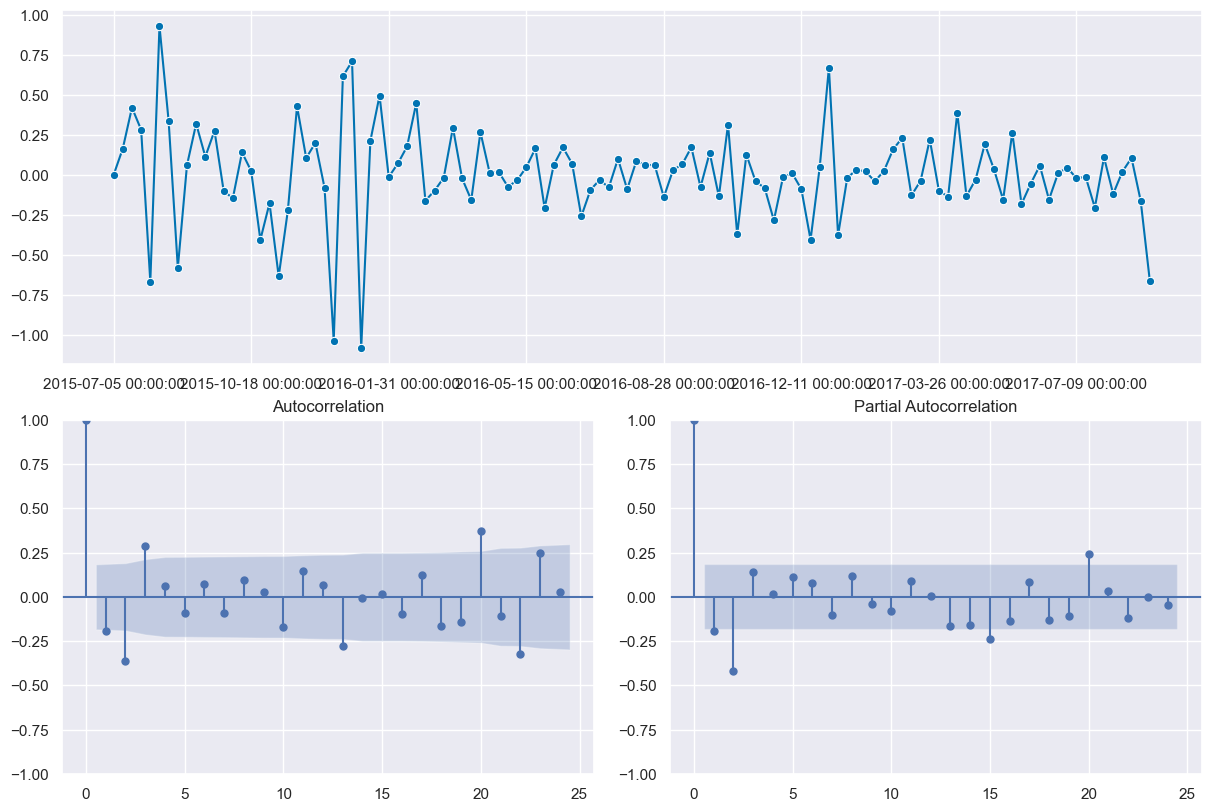

In [ ]:
# Autocorrelation Fuction
# d=1; D=0; S=4
# 
transf_diff=Differencer(lags=[1])
plot_correlations(transf_diff.fit_transform(log_df_w))

Differencer es una clase o función que realiza la diferenciación, y estás especificando que se realice una diferenciación no estacional (d=1) con un lag de 1. De Lag 1, significa que se está diferenciando la serie temporal una vez sin tener en cuenta patrones estacionales

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

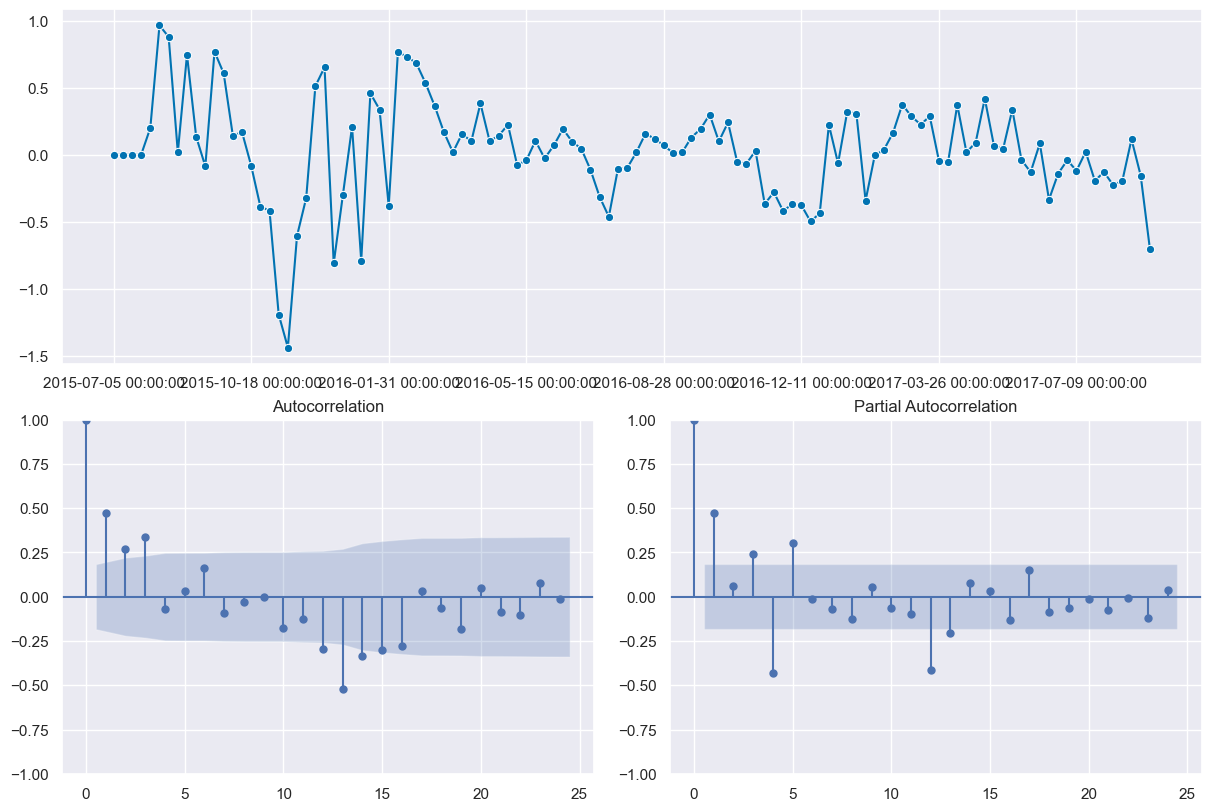

In [ ]:
# Autocorrelation Fuction
# d=0; D=1; S=4
# 
transf_diff=Differencer(lags=[4])
plot_correlations(transf_diff.fit_transform(log_df_w))

La diferenciación estacional implica tomar la diferencia entre los valores de la serie temporal en el mismo punto en diferentes estaciones o períodos, y en este caso, el período es de 4 unidades de tiempo (en este caso, semanas).

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

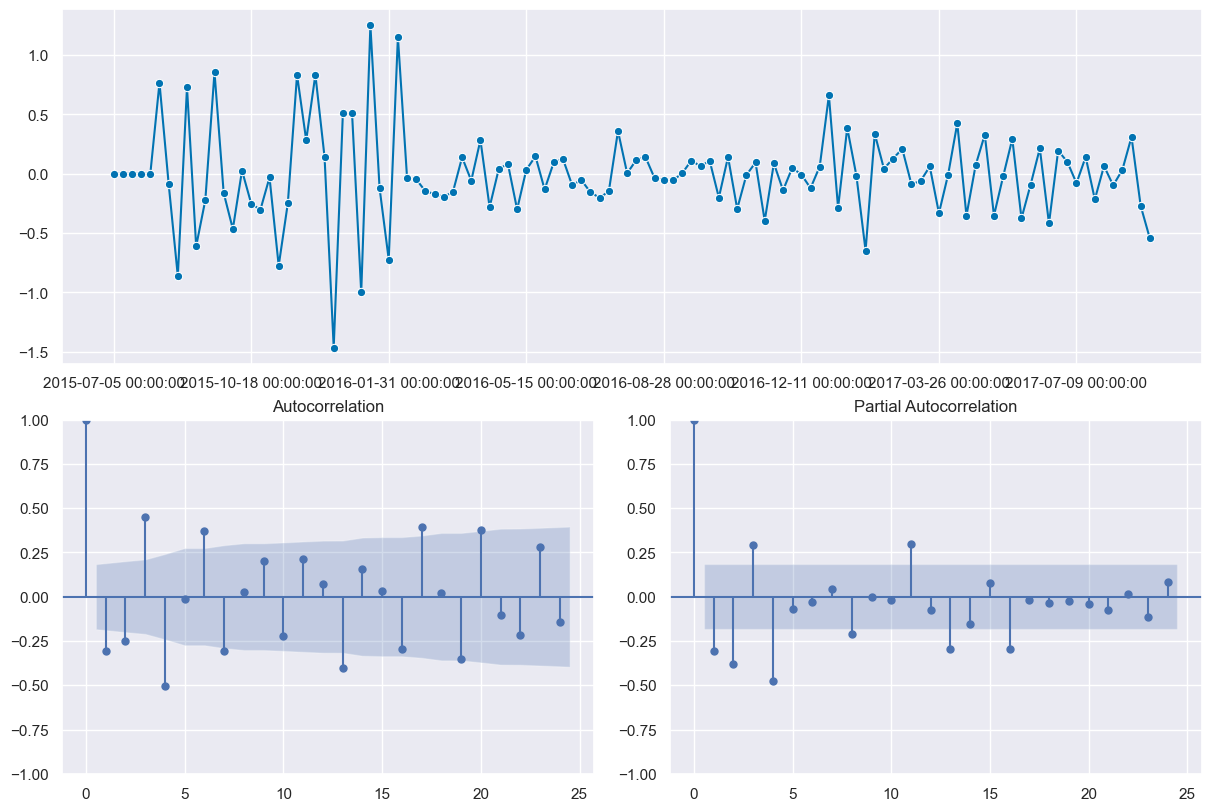

In [ ]:
# Autocorrelation Fuction
# d=1; D=1; S=4
# 
transf_diff=Differencer(lags=[1,4])
plot_correlations(transf_diff.fit_transform(log_df_w))

Dos lags especificados: 1 y 4. Dos tipos de diferenciación:
Diferenciación no estacional (lags=[1]): Se tomará la diferencia entre cada valor y su valor  anterior.
Diferenciación estacional (lags=[4]): Se tomará la diferencia entre cada valor y su valor hace 4 períodos de tiempo (en este caso, semanas).